In [1]:
install.packages("bestNormalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘RcppParallel’, ‘plyr’, ‘prodlim’, ‘lamW’, ‘reshape2’, ‘Rcpp’, ‘iterators’, ‘rngtools’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘lobstr’, ‘LambertW’, ‘nortest’, ‘doParallel’, ‘foreach’, ‘doRNG’, ‘recipes’, ‘butcher’




In [2]:
library(bestNormalize)

# **PART 1**

In [3]:
men_age <- c(52, 18, 27, 12, 24, 17, 68, 25, 12, 9, 51, 44, 42, 34, 44, 15, 21, 66, 61, 32, 31, 20, 6, 13,
             34, 38, 45, 17, 16, 15, 36, 21, 29, 21, 29, 9, 33, 15, 37, 27, 31, 15, 57, 37, 27, 31, 38,
             27, 60, 23)

women_age <- c(36, 49, 20, 31, 51, 31, 15, 16, 39, 41, 52, 16, 39, 34, 18, 34, 30, 18, 26, 18, 25, 16, 39,
               49, 22, 37, 39, 21, 16, 63, 45, 43, 17, 28, 29, 23, 42, 23, 28, 55, 41, 18, 23, 8, 13, 26,
               13, 27, 28, 18)

## Shapiro-Wilk test

In [ ]:
shapiro.test(men_age)
shapiro.test(women_age)


	Shapiro-Wilk normality test

data:  men_age
W = 0.94604, p-value = 0.02351



	Shapiro-Wilk normality test

data:  women_age
W = 0.95655, p-value = 0.06375


# **PART 2**

## bartlett test

In [ ]:
bartlett.test(list(men_age, women_age))


	Bartlett test of homogeneity of variances

data:  list(men_age, women_age)
Bartlett's K-squared = 1.7956, df = 1, p-value = 0.1802


# **PART 3**

## Normalizing

In [ ]:
men_age_boxcox <- bestNormalize::boxcox(men_age)

women_age_boxcox <- bestNormalize::boxcox(women_age)

## Histogram of normalized data

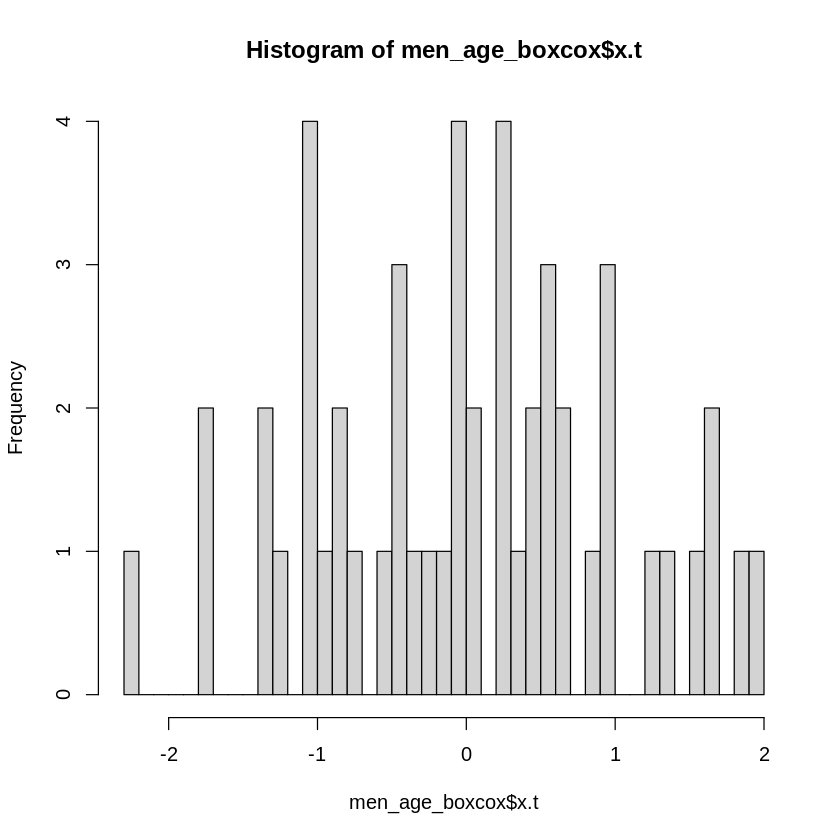

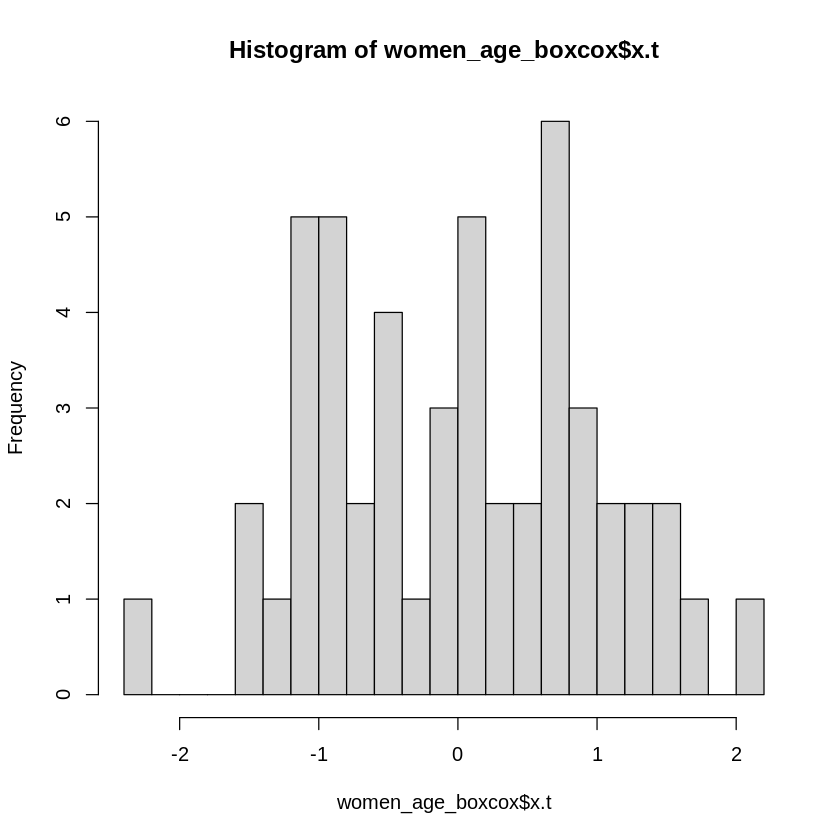

In [ ]:
hist(men_age_boxcox$x.t, breaks = 30)

hist(women_age_boxcox$x.t, breaks = 30)

## Shapiro-Wilk test

In [ ]:
shapiro.test(men_age_boxcox$x.t)

shapiro.test(women_age_boxcox$x.t)


	Shapiro-Wilk normality test

data:  men_age_boxcox$x.t
W = 0.98669, p-value = 0.8411



	Shapiro-Wilk normality test

data:  women_age_boxcox$x.t
W = 0.98056, p-value = 0.576


# **PART 4**

## T-test

In [ ]:
t.test(men_age_boxcox$x.t,women_age_boxcox$x.t)


	Welch Two Sample t-test

data:  men_age_boxcox$x.t and women_age_boxcox$x.t
t = -3.0594e-15, df = 98, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3968935  0.3968935
sample estimates:
    mean of x     mean of y 
-2.919995e-16  3.198830e-16 


# **PART 5**

## Mann-Whitney U test

In [4]:
wilcox.test(men_age, women_age)


	Wilcoxon rank sum test with continuity correction

data:  men_age and women_age
W = 1224, p-value = 0.8604
alternative hypothesis: true location shift is not equal to 0
